In [1]:
#import dependencies
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import json
import statistics
import matplotlib.pyplot as plt
import numpy as np
import requests
from pprint import pprint
from time import sleep


In [2]:
#make api requests for more data
url = "https://api.themoviedb.org/3/discover/movie?api_key=947778a6875678206b391f256e04d8a7&language=en-US&sort_by=popularity.desc&include_adult=false&include_video=false&primary_release_year=2017&vote_count.gte=100&page="
fresponse=[]
json=[]
for i in range (1,19):
    furl=url+"%d"%i
    response = requests.get(furl).json()

    for item in response["results"]:
        fresponse.append(item)

# print(len(fresponse))

movie_id_list=[]
for i in range (len(fresponse)):
    movie_id_list.append(fresponse[i]["id"])

# len(movie_id_list)

df = pd.DataFrame({"id":movie_id_list})
df["budget"]=""   
df["genres"]=""     
df["original_title"]=""    
df["popularity"]=""    
df["production_companies"]=""    
df["release_date"]=""    
df["revenue"]=""    
df["runtime"]=""    
df["vote_average"]=""    
df["vote_count"]=""
df["overview"] =""
# df.head()

for index, row in df.iterrows():
    movie_id = row['id']
    url=f"https://api.themoviedb.org/3/movie/{movie_id}?api_key=947778a6875678206b391f256e04d8a7&language=en-US"
    response = requests.get(url).json()
    df.loc[index, 'budget'] = response['budget']
    df.at[index, 'genres'] = response['genres']
    df.loc[index, 'original_title'] = response['original_title']
    df.loc[index, 'popularity'] = response['popularity']
    df.at[index, 'production_companies'] = response['production_companies']
    df.loc[index, 'release_date'] = response['release_date']
    df.loc[index, 'revenue'] = response['revenue']
    df.loc[index, 'runtime'] = response['runtime']
    df.loc[index, 'vote_average'] = response['vote_average']
    df.loc[index, 'vote_count'] = response['vote_count']
    df.loc[index, 'overview'] = response['overview']
    sleep(0.3)
    
df.to_csv("2017_movie_info.csv", index=False, header=True)
df.head()    

KeyboardInterrupt: 

In [2]:
#read the created data from a csv to avoid re-running the api calls every time the notebook is opened
api_df = pd.read_csv("2017_movie_info.csv")
api_df = pd.DataFrame(api_df)
api_df

#edit the text in certain columns to be used later, they need double quotes instead of single
#create an empty list to put the new text into
text_edit_list=[]
#go through each row for the needed column
for row in api_df["genres"]:
    #replace the characters
    jrow=row.replace("'", '\"')
#     print(jrow)
    #append the replaced string to a list
    text_edit_list.append(jrow)
#change the genres column to the new text    
api_df["genres"] = text_edit_list 

#repeat for the production_compaines column
text_edit_list_2 = []
for row in api_df["production_companies"]:
    
    jrow2=row.replace("'", "\"")
    text_edit_list_2.append(jrow2)
api_df["production_companies"] = text_edit_list_2    

#run vader on the overviews to get the overall sentiment of the movie description
compund = []
for index, row in api_df.iterrows():

    try:
        results = analyzer.polarity_scores(api_df["overview"][index])
        comp = results["compound"]  
  
    except:
        comp= results["compound"]

    compund.append(comp)
#add the column to the data frame    
api_df["compound_score"] = compund  
api_df

,id,budget,genres,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count,overview,compound_score
0,284053,180000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Thor: Ragnarok,109.021591,"[{""id"": 420, ""logo_path"": ""/hUzeosd33nzE5MCNsZ...",2017-10-25,853977000,130.0,7.5,7007,Thor is on the other side of the universe and ...,-0.8519
1,274855,120000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",Geostorm,53.553775,"[{""id"": 101832, ""logo_path"": ""/vO7CKIeogFxphT1...",2017-10-13,221600160,109.0,5.8,1493,After an unprecedented series of natural disas...,-0.8779
2,181808,200000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",Star Wars: The Last Jedi,52.798146,"[{""id"": 1, ""logo_path"": ""/o86DbpburjxrqAzEDhXZ...",2017-12-13,1332459537,152.0,7.1,5847,Rey develops her newly discovered abilities wi...,0.0772
3,281338,150000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 878, ""nam...",War for the Planet of the Apes,51.384361,"[{""id"": 22213, ""logo_path"": ""/qx9K6bFWJupwde0x...",2017-07-11,488533726,140.0,6.9,3950,Caesar and his apes are forced into a deadly c...,-0.8658
4,263115,97000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",Logan,44.214025,"[{""id"": 431, ""logo_path"": None, ""name"": ""The D...",2017-02-28,616801808,137.0,7.7,9458,"In the near future, a weary Logan cares for an...",-0.1531
5,297762,149000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Wonder Woman,41.191891,"[{""id"": 444, ""logo_path"": None, ""name"": ""Dune ...",2017-05-30,821847012,141.0,7.2,9230,An Amazon princess comes to the world of Man i...,-0.8910
6,141052,500000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Justice League,40.197749,"[{""id"": 429, ""logo_path"": ""/2Tc1P3Ac8M479naPp1...",2017-11-15,657924295,120.0,6.3,4881,Fuelled by his restored faith in humanity and ...,0.2023
7,283995,200000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Guardians of the Galaxy Vol. 2,38.677640,"[{""id"": 420, ""logo_path"": ""/hUzeosd33nzE5MCNsZ...",2017-04-19,863756051,137.0,7.6,8587,The Guardians must fight to keep their newfoun...,0.0516
8,381288,9000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",Split,36.689713,"[{""id"": 33, ""logo_path"": ""/8lvHyhjr8oUKOOy2dKX...",2017-01-19,278304578,117.0,7.1,6820,Though Kevin has evidenced 23 personalities to...,0.0516
9,335984,150000000,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 878, ...",Blade Runner 2049,35.933138,"[{""id"": 79529, ""logo_path"": ""/gVN3k8emmKy4iV4K...",2017-10-04,259239658,163.0,7.3,4646,Thirty years after the events of the first fil...,-0.7096


In [3]:
#create a data frame for the kaggle data from it's csv
string_lists = pd.read_csv("tmdb_5000_movies.csv")
string_lists = pd.DataFrame(string_lists)
string_lists

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

In [4]:
#run a vader on the df
compund = []
for index, row in string_lists.iterrows():

    try:
        results = analyzer.polarity_scores(string_lists["overview"][index])
        comp = results["compound"]  
#         compound.append(comp)  
    except:
        comp= results["compound"]
#         print(comp)
    compund.append(comp)

In [5]:
#add the results to the data frame
string_lists["compound_score"] = compund
string_lists

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,compound_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,-0.3612
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,-0.3919
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,-0.8271
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,-0.9136
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,-0.7096
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,0.5859
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,0.4215
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,

In [6]:
#append the api data frame to the inital data
merged_df = string_lists.append(api_df)

#reset the index and remove unwanted columns
merged_df = merged_df.reset_index()
merged_df = merged_df[["budget", "compound_score", "genres", "original_title", "production_companies", "release_date", "revenue",
                      "runtime", "vote_average", "vote_count"]]
merged_df

,budget,compound_score,genres,original_title,production_companies,release_date,revenue,runtime,vote_average,vote_count
0,237000000,-0.3612,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Avatar,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,7.2,11800
1,300000000,-0.3919,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Pirates of the Caribbean: At World's End,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,6.9,4500
2,245000000,-0.8271,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Spectre,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,6.3,4466
3,250000000,-0.9136,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",The Dark Knight Rises,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,7.6,9106
4,260000000,-0.7096,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",John Carter,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,6.1,2124
5,258000000,0.5859,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",Spider-Man 3,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2007-05-01,890871626,139.0,5.9,3576
6,260000000,0.4215,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",Tangled,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2010-11-24,591794936,100.0,7.4,3330
7,280000000,-0.3182,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Avengers: Age of Ultron,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",2015-04-22,1405403694,141.0,7.3,6767
8,250000000,0.0000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Harry Potter and the Half-Blood Prince,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...",2009-07-07,933959197,153.0,7.4,5293
9,250000000,0.3612,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Batman v Superman: Dawn of Justice,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...",2016-03-23,873260194,151.0,5.7,7004


In [7]:
#create a list of unique genres by starting wiht an empty list
unique_genres = []

#then go through each row in the genres column and
for row in merged_df["genres"]:
    #load it into a varable using json.loads
    jdata = json.loads(row)
    #go through each dictionary in in the variable and
    for d in jdata:
        #check to see if the name has been placed into the unique_genres list yet
        if d["name"] not in unique_genres:
            #if not, append it to the list
            unique_genres.append(d['name'])
#Remove spaces from the genres            
unique_genres  = [w.replace(" ", "_") for w in unique_genres]  
#display the list so each genre can be seen
unique_genres

['Action',
 'Adventure',
 'Fantasy',
 'Science_Fiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western',
 'Comedy',
 'Romance',
 'Horror',
 'Mystery',
 'History',
 'War',
 'Music',
 'Documentary',
 'Foreign',
 'TV_Movie']

In [8]:
#Create a data frame for each genre to compare with each other

#Createan empty list for each genre programmatically
for n in unique_genres:
    globals()[n] = []


#go through each row in the cleaned dataframe and
for index,row in merged_df.iterrows():
    #use json.loads on the genres column at the position of the current index 
    jdata = json.loads(merged_df["genres"][index])
    
    #for each dictionary in the created variable, check which genres appear and append to the proper list
    #DO NOT USE elif, to check if a row belongs in multiple lists use a seperate if statement for each list
    for d in jdata:

        if d["name"] == "Action":
            Action.append(row)
            
        if d["name"] == "Adventure":
            Adventure.append(row) 
        
        if d["name"] == "Fantasy":
            Fantasy.append(row)  
            
        if d["name"] == "Science Fiction":
            Science_Fiction.append(row)  
            
        if d["name"] == "Crime":
            Crime.append(row)  
            
        if d["name"] == "Drama":
            Drama.append(row)  
            
        if d["name"] == "Thriller":
            Thriller.append(row)  
            
        if d["name"] == "Animation":
            Animation.append(row)  
        
        if d["name"] == "Family":
            Family.append(row)  
        
        if d["name"] == "Western":
            Western.append(row)  
            
        if d["name"] == "Comedy":
            Comedy.append(row)  
            
        if d["name"] == "Romance":
            Romance.append(row)  
            
        if d["name"] == "Horror":
            Horror.append(row)  
         
        if d["name"] == "Mystery":
            Mystery.append(row)  
            
        if d["name"] == "History":
            History.append(row)  
            
        if d["name"] == "War":
            War.append(row)  
            
        if d["name"] == "Music":
            Music.append(row)  
            
        if d["name"] == "Documentary":
            Documentary.append(row)  
            
        if d["name"] == "TV Movie":
            TV_Movie.append(row)      
        
#convert them all to dataframes
Action_df = pd.DataFrame(Action)
Adventure_df = pd.DataFrame(Adventure)
Fantasy_df = pd.DataFrame(Fantasy)
Science_Fiction_df = pd.DataFrame(Science_Fiction)
Crime_df = pd.DataFrame(Crime)
Drama_df = pd.DataFrame(Drama)
Thriller_df = pd.DataFrame(Thriller)
Animation_df = pd.DataFrame(Animation)
Family_df = pd.DataFrame(Family)
Western_df = pd.DataFrame(Western)
Comedy_df = pd.DataFrame(Comedy)
Romance_df = pd.DataFrame(Romance)
Horror_df = pd.DataFrame(Horror)
Mystery_df = pd.DataFrame(Mystery)
History_df = pd.DataFrame(History)
War_df = pd.DataFrame(War)
Music_df = pd.DataFrame(Music)
Documentary_df = pd.DataFrame(Documentary)
TV_Movie_df = pd.DataFrame(TV_Movie)


##The code under here works to be used elsewhere
# sums = []
# for index,row in Adventure_df.iterrows():
#     sums.append(Adventure_df["vote_average"][index])
# averages = (sum(sums)/len(sums)).round(2)    
# averages
##The code above works to be used elsewhere

In [9]:
#create a list to find each unique company
unique_companies = []
unique_companies_to_list=[]

#then go through each row in the production_companies column and
for row in merged_df["production_companies"]:
    
    #if it can't be loaded put in a value to be removed later
    try:
        jdata2 = json.loads(row)
    except:
        jdata2 = [{"name": "Not"}]

    #go through each dictionary in in the variable and
    for d in jdata2:

        #check to see if the name has been placed into the unique_companies list yet
        if d["name"] not in unique_companies:
            #if not, append it to the list        
            unique_companies.append(d['name'])
#             unique_companies_to_list.append(d['name']) 

#remove unwated characters from the names so that the names can be used as variables, store the edited stings in a different list         
unique_companies_to_list  = [w.replace(" ", "_") for w in unique_companies]
unique_companies_to_list  = [w.replace(".", "") for w in unique_companies_to_list]
unique_companies_to_list = [w.replace("-", "_") for w in unique_companies_to_list]
unique_companies_to_list = [w.replace("(MGM)", "MGM") for w in unique_companies_to_list]
#display the list so each company can be seen
unique_companies_to_list

['Ingenious_Film_Partners',
 'Twentieth_Century_Fox_Film_Corporation',
 'Dune_Entertainment',
 'Lightstorm_Entertainment',
 'Walt_Disney_Pictures',
 'Jerry_Bruckheimer_Films',
 'Second_Mate_Productions',
 'Columbia_Pictures',
 'Danjaq',
 'B24',
 'Legendary_Pictures',
 'Warner_Bros',
 'DC_Entertainment',
 'Syncopy',
 'Laura_Ziskin_Productions',
 'Marvel_Enterprises',
 'Walt_Disney_Animation_Studios',
 'Marvel_Studios',
 'Prime_Focus',
 'Revolution_Sun_Studios',
 'Heyday_Films',
 'DC_Comics',
 'Atlas_Entertainment',
 'Cruel_&_Unusual_Films',
 'RatPac_Dune_Entertainment',
 'Bad_Hat_Harry_Productions',
 'Eon_Productions',
 'Infinitum_Nihil',
 'Silver_Bullet_Productions_(II)',
 'Blind_Wink_Productions',
 'Classic_Media',
 'Cruel_and_Unusual_Films',
 'Walt_Disney',
 'Walden_Media',
 'Stillking_Films',
 'Ozumi_Films',
 'Propeler',
 'Silverbell_Films',
 'Paramount_Pictures',
 'Moving_Picture_Company_(MPC)',
 'Amblin_Entertainment',
 'Media_Magik_Entertainment',
 'Imagenation_Abu_Dhabi_FZ',
 'H

In [10]:
#create a list to use to count how many times a company appears
comp_counter = []
#for each company in the unique_companies list, set a value of 0
for comp in range(len(unique_companies)):
    comp_counter.append(0)

#go through each row in the merged_df to count the occurance of each company by
for row in merged_df["production_companies"]:
    #load it into a varable using json.loads
    #if it can't be loaded put in a value to be removed later
    try:
        jdata2 = json.loads(row)
    except:
        jdata2 = [{"name": "Not"}]

    #go through each dictionary in in the variable and
    for d in jdata2:
        #also go through each element in unique_companies
        for compa in range(len(unique_companies)):
            #check when the names match and
            if d['name'] == unique_companies[compa]:
                #increment the counter at the location corresponding to the matching names
                comp_counter[compa] +=1

In [11]:
#create a zipped object with the unique_companies_to_list and the comp_counter
zipped_look = zip(unique_companies_to_list, comp_counter)
#store it in a variable
companies_dict = dict(zipped_look)

In [12]:
#display the variable to check if there is an obvious error
companies_dict

{'Ingenious_Film_Partners': 29,
 'Twentieth_Century_Fox_Film_Corporation': 222,
 'Dune_Entertainment': 59,
 'Lightstorm_Entertainment': 5,
 'Walt_Disney_Pictures': 118,
 'Jerry_Bruckheimer_Films': 21,
 'Second_Mate_Productions': 2,
 'Columbia_Pictures': 203,
 'Danjaq': 8,
 'B24': 1,
 'Legendary_Pictures': 34,
 'Warner_Bros': 319,
 'DC_Entertainment': 15,
 'Syncopy': 8,
 'Laura_Ziskin_Productions': 5,
 'Marvel_Enterprises': 16,
 'Walt_Disney_Animation_Studios': 8,
 'Marvel_Studios': 15,
 'Prime_Focus': 1,
 'Revolution_Sun_Studios': 16,
 'Heyday_Films': 10,
 'DC_Comics': 17,
 'Atlas_Entertainment': 13,
 'Cruel_&_Unusual_Films': 1,
 'RatPac_Dune_Entertainment': 13,
 'Bad_Hat_Harry_Productions': 12,
 'Eon_Productions': 22,
 'Infinitum_Nihil': 4,
 'Silver_Bullet_Productions_(II)': 1,
 'Blind_Wink_Productions': 1,
 'Classic_Media': 1,
 'Cruel_and_Unusual_Films': 7,
 'Walt_Disney': 7,
 'Walden_Media': 19,
 'Stillking_Films': 9,
 'Ozumi_Films': 1,
 'Propeler': 1,
 'Silverbell_Films': 1,
 'Para

In [13]:
#turn the dictionary into a dataframe
find_most_occuring = pd.DataFrame([companies_dict])
#transpose the row and column
find_most_occuring = find_most_occuring.transpose()
#rename the column
find_most_occuring = find_most_occuring.rename(columns={0:"Count"})
#sort the data frame to find the compainies that appear the most
find_most_occuring = find_most_occuring.sort_values("Count", ascending=False)
#display the 10 most occuring companies
find_most_occuring.head(11)

,Count
Warner_Bros,319
Universal_Pictures,312
Paramount_Pictures,285
Not,282
Twentieth_Century_Fox_Film_Corporation,222
Columbia_Pictures,203
New_Line_Cinema,167
Metro_Goldwyn_Mayer_MGM,122
Walt_Disney_Pictures,118
Touchstone_Pictures,118


In [14]:
#Create dataframes for each of the top ten companies
#first by createing an empty list to holf them
create_comp_dfs = []

#reset the index on the dataframe so the company names will be a normal column
find_most_occuring1 = find_most_occuring.reset_index()

#create a counter variable
limit_rows_to_11 = 0
#run the loop while the counter variable is below the wanted threshold
while limit_rows_to_11 < 11:

    #set the name of each company to a variable
    take_value = find_most_occuring1["index"][limit_rows_to_11]
    #and append the variable to ta list
    create_comp_dfs.append(take_value)
    #increment the counter
    limit_rows_to_11 += 1
#after the list is completed, find and delete the 'Not" entry as it is not a production company    
del create_comp_dfs[3]
#display the list
create_comp_dfs    

['Warner_Bros',
 'Universal_Pictures',
 'Paramount_Pictures',
 'Twentieth_Century_Fox_Film_Corporation',
 'Columbia_Pictures',
 'New_Line_Cinema',
 'Metro_Goldwyn_Mayer_MGM',
 'Walt_Disney_Pictures',
 'Touchstone_Pictures',
 'Relativity_Media']

In [15]:
#use the list and a loop to create 
for n in create_comp_dfs:
    globals()[n] = []
    
#go through each row in the cleaned dataframe and
for index,row in merged_df.iterrows():
    # try to use json.loads on the genres column at the position of the current index
    #if there would be an issue use excpet to give the entry a deafult value to throw away
    try:
        jdata = json.loads(merged_df["production_companies"][index])
    except:
        jdata = [{"name": "Not"}]
    
    #for each dictionary in the created variable, check which genres appear and append to the proper list
    #DO NOT USE elif, to check if a row belongs in multiple lists use a seperate if statement for each list
    for d in jdata:

        if d["name"] == "Warner Bros.":
            Warner_Bros.append(row)
         
        if d["name"] == "Universal Pictures":
            Universal_Pictures.append(row)
            
        if d["name"] == "Paramount Pictures":
            Paramount_Pictures.append(row)
           
        if d["name"] == "Twentieth Century Fox Film Corporation":
            Twentieth_Century_Fox_Film_Corporation.append(row)
            
        if d["name"] == "Columbia Pictures":
            Columbia_Pictures.append(row)
           
        if d["name"] == "New Line Cinema":
            New_Line_Cinema.append(row)
           
        if d["name"] == "Metro-Goldwyn-Mayer (MGM)":
            Metro_Goldwyn_Mayer_MGM.append(row)
           
        if d["name"] == "Walt Disney Pictures":
            Walt_Disney_Pictures.append(row)
           
        if d["name"] == "Touchstone Pictures":
            Touchstone_Pictures.append(row)
           
        if d["name"] == "Relativity Media":
            Relativity_Media.append(row)
            
#convert them all to dataframes            
Warner_Bros_df = pd.DataFrame(Warner_Bros)   
Universal_Pictures_df = pd.DataFrame(Universal_Pictures)
Paramount_Pictures_df = pd.DataFrame(Paramount_Pictures)
Twentieth_Century_Fox_Film_Corporation_df = pd.DataFrame(Twentieth_Century_Fox_Film_Corporation)
Columbia_Pictures_df = pd.DataFrame(Columbia_Pictures)
New_Line_Cinema_df = pd.DataFrame(New_Line_Cinema)
Metro_Goldwyn_Mayer_MGM_df = pd.DataFrame(Metro_Goldwyn_Mayer_MGM)
Walt_Disney_Pictures_df = pd.DataFrame(Walt_Disney_Pictures)
Touchstone_Pictures_df = pd.DataFrame(Touchstone_Pictures)
Relativity_Media_df = pd.DataFrame(Relativity_Media)

In [16]:
#find the average of the voter_score for each company and append each to a list to use in a plot
to_plot_comp_by_AVGscore = []
#use np.mean and round the result to 2 decimal places
Warner_Bros_score_avg = round(np.mean(Warner_Bros_df["vote_average"]), 2)
to_plot_comp_by_AVGscore.append(Warner_Bros_score_avg)

Universal_Pictures_score_avg = round(np.mean(Universal_Pictures_df["vote_average"]), 2)
to_plot_comp_by_AVGscore.append(Universal_Pictures_score_avg)

Paramount_Pictures_score_avg = round(np.mean(Paramount_Pictures_df['vote_average']), 2)
to_plot_comp_by_AVGscore.append(Paramount_Pictures_score_avg)

Twentieth_Century_Fox_Film_Corporation_score_avg = round(np.mean(Twentieth_Century_Fox_Film_Corporation_df['vote_average']), 2)
to_plot_comp_by_AVGscore.append(Twentieth_Century_Fox_Film_Corporation_score_avg)

Columbia_Pictures_score_avg = round(np.mean(Columbia_Pictures_df["vote_average"]), 2)
to_plot_comp_by_AVGscore.append(Columbia_Pictures_score_avg)

New_Line_Cinema_score_avg = round(np.mean(New_Line_Cinema_df['vote_average']), 2)
to_plot_comp_by_AVGscore.append(New_Line_Cinema_score_avg)

Metro_Goldwyn_Mayer_MGM_score_average = round(np.mean(Metro_Goldwyn_Mayer_MGM_df['vote_average']), 2)
to_plot_comp_by_AVGscore.append(Metro_Goldwyn_Mayer_MGM_score_average)

Walt_Disney_Pictures_score_avg = round(np.mean(Walt_Disney_Pictures_df['vote_average']), 2)
to_plot_comp_by_AVGscore.append(Walt_Disney_Pictures_score_avg)

Touchstone_Pictures_score_avg = round(np.mean(Touchstone_Pictures_df['vote_average']), 2)
to_plot_comp_by_AVGscore.append(Touchstone_Pictures_score_avg)

Relativity_Media_score_avg =round( np.mean(Relativity_Media_df['vote_average']), 2)
to_plot_comp_by_AVGscore.append(Relativity_Media_score_avg)

to_plot_comp_by_AVGscore

[6.35, 6.27, 6.25, 6.2, 6.17, 6.15, 6.08, 6.34, 6.27, 6.12]

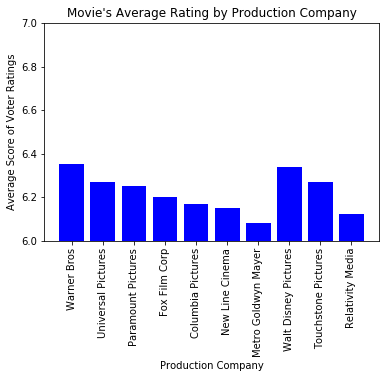

In [17]:
#Shorten some names for display
comp_plot_labels = [w.replace("Twentieth_Century_Fox_Film_Corporation", "Fox Film Corp") for w in create_comp_dfs]
comp_plot_labels = [w.replace("Metro_Goldwyn_Mayer_MGM", "Metro_Goldwyn_Mayer") for w in comp_plot_labels]
#remove the _ from each companies name to make a nicer looking plot
comp_plot_labels = [w.replace("_", " ") for w in comp_plot_labels]

#create a plot to see which which production company produces the most liked movies
fig, ax1 = plt.subplots()

x_axis = np.arange(len(to_plot_comp_by_AVGscore))

tick_locations = [value for value in x_axis]
ax1.bar(x_axis, to_plot_comp_by_AVGscore, color="b", align="center")
plt.xticks(tick_locations, comp_plot_labels, rotation=90)
# ax1.grid()
plt.xlabel("Production Company")
plt.ylabel("Average Score of Voter Ratings")
plt.title("Movie's Average Rating by Production Company")
plt.ylim(6, 7)


plt.savefig("Rating_Comp.png", bbox_inches='tight')
plt.show("Rating_Comp.png")

In [20]:
#find the average of the Revenue for each company and append each to a list to use in a plot
to_plot_comp_by_AVGrevenue = []
#use np.mean and round the result to 2 decimal places
Warner_Bros_revenue_avg = round(np.mean(Warner_Bros_df["revenue"]), 2)
to_plot_comp_by_AVGrevenue.append(Warner_Bros_revenue_avg)

Universal_Pictures_revenue_avg = round(np.mean(Universal_Pictures_df["revenue"]), 2)
to_plot_comp_by_AVGrevenue.append(Universal_Pictures_revenue_avg)

Paramount_Pictures_revenue_avg = round(np.mean(Paramount_Pictures_df['revenue']), 2)
to_plot_comp_by_AVGrevenue.append(Paramount_Pictures_revenue_avg)

Twentieth_Century_Fox_Film_Corporation_revenue_avg = round(np.mean(Twentieth_Century_Fox_Film_Corporation_df['revenue']), 2)
to_plot_comp_by_AVGrevenue.append(Twentieth_Century_Fox_Film_Corporation_revenue_avg)

Columbia_Pictures_revenue_avg = round(np.mean(Columbia_Pictures_df["revenue"]), 2)
to_plot_comp_by_AVGrevenue.append(Columbia_Pictures_revenue_avg)

New_Line_Cinema_revenue_avg = round(np.mean(New_Line_Cinema_df['revenue']), 2)
to_plot_comp_by_AVGrevenue.append(New_Line_Cinema_revenue_avg)

Metro_Goldwyn_Mayer_MGM_revenue_average = round(np.mean(Metro_Goldwyn_Mayer_MGM_df['revenue']), 2)
to_plot_comp_by_AVGrevenue.append(Metro_Goldwyn_Mayer_MGM_revenue_average)

Walt_Disney_Pictures_revenue_avg = round(np.mean(Walt_Disney_Pictures_df['revenue']), 2)
to_plot_comp_by_AVGrevenue.append(Walt_Disney_Pictures_revenue_avg)

Touchstone_Pictures_revenue_avg = round(np.mean(Touchstone_Pictures_df['revenue']), 2)
to_plot_comp_by_AVGrevenue.append(Touchstone_Pictures_revenue_avg)

Relativity_Media_revenue_avg =round( np.mean(Relativity_Media_df['revenue']), 2)
to_plot_comp_by_AVGrevenue.append(Relativity_Media_revenue_avg)

to_plot_comp_by_AVGrevenue

[154093253.52,
 139807751.69,
 143433414.61,
 177284465.36,
 143230464.35,
 116943020.03,
 82290756.75,
 272315370.43,
 89533808.64,
 125107957.78]

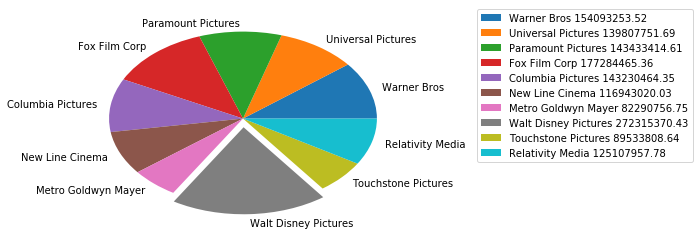

In [76]:
labels = [f'Warner Bros {Warner_Bros_revenue_avg}', f'Universal Pictures {Universal_Pictures_revenue_avg}', 
f'Paramount Pictures {Paramount_Pictures_revenue_avg}', f'Fox Film Corp {Twentieth_Century_Fox_Film_Corporation_revenue_avg}',
         f'Columbia Pictures {Columbia_Pictures_revenue_avg}', f'New Line Cinema {New_Line_Cinema_revenue_avg}',
         f'Metro Goldwyn Mayer {Metro_Goldwyn_Mayer_MGM_revenue_average}', 
          f'Walt Disney Pictures {Walt_Disney_Pictures_revenue_avg}',
         f'Touchstone Pictures {Touchstone_Pictures_revenue_avg}', f'Relativity Media {Relativity_Media_revenue_avg}']

plt.pie(to_plot_comp_by_AVGrevenue, explode=[0,0,0,0,0,0,0,0.1,0,0], labels=comp_plot_labels)
plt.legend(labels,loc=(1.2,.3))
plt.savefig('comp_rev_PIE.png')
plt.show('comp_rev_PIE.png')

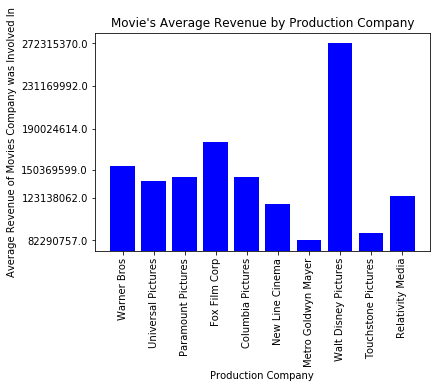

In [43]:
fig, ax1 = plt.subplots()
y_min = min(to_plot_comp_by_AVGrevenue)
y_max = max(to_plot_comp_by_AVGrevenue)
y_labels = [round(y_min,0), round(y_min+(.25*y_max),0),round(y_min+(.15*y_max),0) ,round((y_max-(y_min*.5)),0),
            round((y_max-y_min),0) ,round(y_max,0)]


x_axis = np.arange(len(to_plot_comp_by_AVGrevenue))

tick_locations = [value for value in x_axis]
ax1.bar(x_axis, to_plot_comp_by_AVGrevenue, color="b", align="center")
plt.xticks(tick_locations, comp_plot_labels, rotation=90)
# ax1.grid()
plt.xlabel("Production Company")
plt.ylabel("Average Revenue of Movies Company was Involved In")
plt.title("Movie's Average Revenue by Production Company")
plt.ylim(min(to_plot_comp_by_AVGrevenue)-10000000, max(to_plot_comp_by_AVGrevenue)+10000000)
y_locations = [value for value in y_labels]


plt.yticks(y_locations, y_labels)

plt.savefig("Revenue_Comp.png", bbox_inches='tight')
plt.show("Revenue_Comp.png")

In [19]:
rating_params = merged_df.loc[merged_df["vote_average"] > 0 ]
rating_params = rating_params.loc[rating_params['vote_count'] > 100]
find_lowest_over_rating = rating_params.loc[rating_params['vote_average'] == min(rating_params["vote_average"])]
find_higest_over_rating = rating_params.loc[rating_params['vote_average'] == max(rating_params['vote_average'])]
find_higest_over_rating

,budget,compound_score,genres,original_title,production_companies,release_date,revenue,runtime,vote_average,vote_count
1881,25000000,-0.7003,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",The Shawshank Redemption,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",1994-09-23,28341469,142.0,8.5,8205


In [20]:
#find the average of the voter_score for each genre and append each to a list to use in a plot
to_plot_genre_by_AVGscore = []
#use np.mean and round the result to 2 decimal places
Action_score_avg = round(np.mean(Action_df["vote_average"]), 2)
to_plot_genre_by_AVGscore.append(Action_score_avg)

Adventure_score_avg = round(np.mean(Adventure_df["vote_average"]), 2)
to_plot_genre_by_AVGscore.append(Adventure_score_avg)

Fantasy_score_avg = round(np.mean(Fantasy_df["vote_average"]), 2)
to_plot_genre_by_AVGscore.append(Fantasy_score_avg)

Science_Fiction_score_avg = round(np.mean(Science_Fiction_df["vote_average"]), 2)
to_plot_genre_by_AVGscore.append(Science_Fiction_score_avg)

Crime_avg_score = round(np.mean(Crime_df["vote_average"]), 2)
to_plot_genre_by_AVGscore.append(Crime_avg_score)

Drama_score_avg = round(np.mean(Drama_df["vote_average"]), 2)
to_plot_genre_by_AVGscore.append(Drama_score_avg)

Thriller_score_average = round(np.mean(Thriller_df["vote_average"]), 2)
to_plot_genre_by_AVGscore.append(Thriller_score_average)

Animation_score_avg = round(np.mean(Animation_df["vote_average"]), 2)
to_plot_genre_by_AVGscore.append(Animation_score_avg)

Family_score_avg = round(np.mean(Family_df["vote_average"]), 2)
to_plot_genre_by_AVGscore.append(Family_score_avg)

Western_df_score_avg = round(np.mean(Western_df["vote_average"]), 2)
to_plot_genre_by_AVGscore.append(Western_df_score_avg)

Comedy_score_avg = round(np.mean(Comedy_df["vote_average"]), 2)
to_plot_genre_by_AVGscore.append(Comedy_score_avg)

Romance_score_avg = round(np.mean(Romance_df["vote_average"]), 2)
to_plot_genre_by_AVGscore.append(Romance_score_avg)

Horror_score_avg = round(np.mean(Horror_df["vote_average"]), 2)
to_plot_genre_by_AVGscore.append(Horror_score_avg)

Mystery_score_avg = round(np.mean(Mystery_df["vote_average"]), 2)
to_plot_genre_by_AVGscore.append(Mystery_score_avg)

History_df_score_avg = round(np.mean(History_df["vote_average"]), 2)
to_plot_genre_by_AVGscore.append(History_df_score_avg)

War_score_avg = round(np.mean(War_df["vote_average"]), 2)
to_plot_genre_by_AVGscore.append(War_score_avg)

Music_score_avg = round(np.mean(Music_df["vote_average"]), 2)
to_plot_genre_by_AVGscore.append(Music_score_avg)

Documentary_score_avg = round(np.mean(Documentary_df["vote_average"]), 2)
to_plot_genre_by_AVGscore.append(Documentary_score_avg)

TV_Movie_score_avg = round(np.mean(TV_Movie_df["vote_average"]), 2)
to_plot_genre_by_AVGscore.append(TV_Movie_score_avg)


to_plot_genre_by_AVGscore

[6.01,
 6.18,
 6.12,
 6.02,
 6.28,
 6.4,
 6.01,
 6.38,
 6.06,
 6.17,
 5.97,
 6.22,
 5.64,
 6.19,
 6.73,
 6.71,
 6.36,
 6.3,
 5.78]

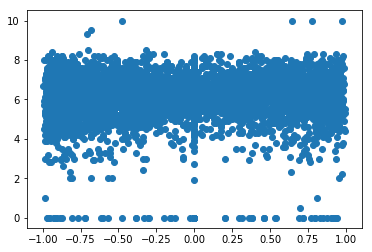

In [26]:
plt.scatter(merged_df["compound_score"], merged_df["vote_average"])